In [9]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import os

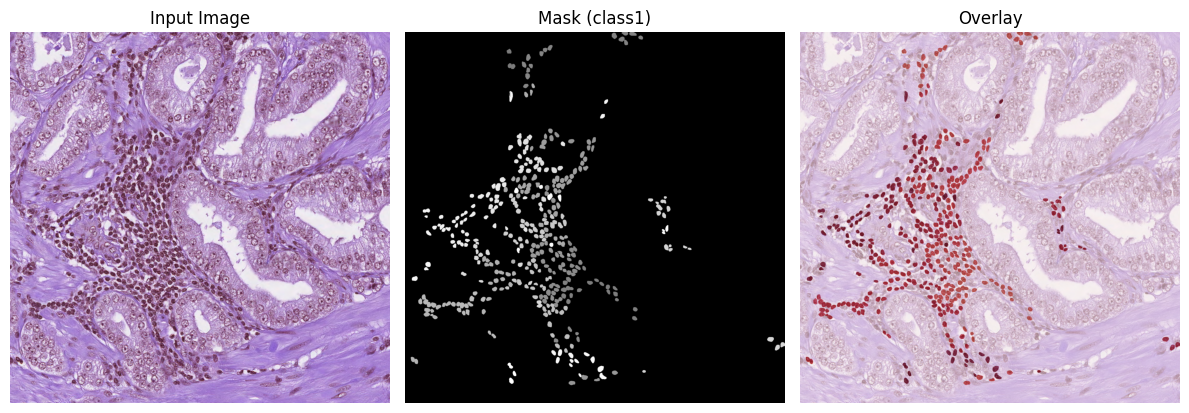

Image shape: (1731, 1772, 4)
Mask shape: (1731, 1772)
Mask dtype: float64
Mask unique pixel values: [  0. 372. 373. 374. 375. 376. 377. 378. 379. 380. 381. 382. 383. 384.
 385. 386. 387. 388. 389. 390. 391. 392. 393. 394. 395. 396. 397. 398.
 399. 400. 401. 402. 403. 404. 405. 406. 407. 408. 409. 410. 411. 412.
 413. 414. 415. 416. 417. 418. 419. 420. 421. 422. 423. 424. 425. 426.
 427. 428. 429. 430. 431. 432. 433. 434. 435. 436. 437. 438. 439. 440.
 441. 442. 443. 444. 445. 446. 447. 448. 449. 450. 451. 452. 453. 454.
 455. 456. 457. 458. 459. 460. 461. 462. 463. 464. 465. 466. 467. 468.
 469. 470. 471. 472. 473. 474. 475. 476. 477. 478. 479. 480. 481. 482.
 483. 484. 485. 486. 487. 488. 489. 490. 491. 492. 493. 494. 495. 496.
 497. 498. 499. 500. 501. 502. 503. 504. 505. 506. 507. 508. 509. 510.
 511. 512. 513. 514. 515. 516. 517. 518. 519. 520. 521. 522. 523. 524.
 525. 526. 527. 528. 529. 530. 531. 532. 533. 534. 535. 536. 537. 538.
 539. 540. 541. 542. 543. 544. 545. 546. 547. 54

In [10]:
folder = "data/train/485b3023-389b-4bd8-9312-bb9ccb392e0a"

img = imread(os.path.join(folder, "image.tif"))
mask = imread(os.path.join(folder, "class2.tif"))  # 假設 class1.tif 存在

# 顯示原圖
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
plt.title("Input Image")
plt.axis('off')

# 顯示 mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask (class1)")
plt.axis('off')

# 疊加顯示
plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.title("Overlay")
plt.axis('off')

plt.tight_layout()
plt.show()

# 分析像素值
print("Image shape:", img.shape)
print("Mask shape:", mask.shape)
print("Mask dtype:", mask.dtype)
print("Mask unique pixel values:", np.unique(mask))

In [11]:
import random
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog
from dataloader import register_custom_dataset



In [12]:
def preview_random_sample(dataset_name):
    from detectron2.data import MetadataCatalog
    dataset_dicts = DatasetCatalog.get(dataset_name)
    metadata = MetadataCatalog.get(dataset_name)

    sample = random.choice(dataset_dicts)

    img = imread(sample["file_name"])

    visualizer = Visualizer(img[:, :, :3], metadata=metadata, scale=1.0)
    out = visualizer.draw_dataset_dict(sample)

    plt.figure(figsize=(12, 8))
    plt.imshow(out.get_image())
    plt.axis("off")
    plt.title(sample["file_name"])
    plt.show()

Loading cached dataset from: data/train/my_instance_dataset_dicts.pkl
Registered dataset 'my_instance_dataset'
 Registered dataset 'my_instance_dataset' with 209 samples.


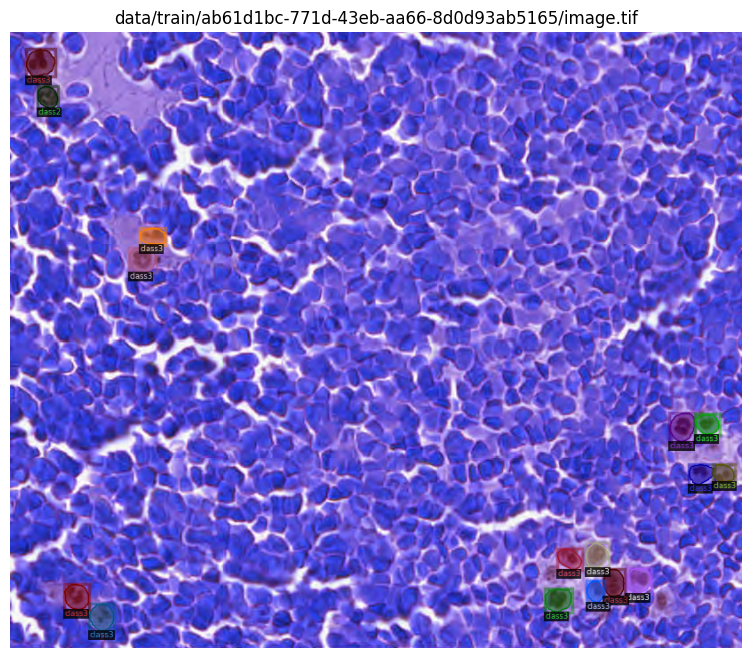

In [13]:
root_dir = "data/train"
class_names = ["class1", "class2", "class3", "class4"]
dataset_name = "my_instance_dataset"

# 註冊 dataset
register_custom_dataset(root_dir, class_names, dataset_name)
# 顯示一筆樣本
preview_random_sample(dataset_name)

In [14]:
import os
import numpy as np
import tifffile

dataset_root = "data/train"
max_instances = 0
max_image_name = ""
instance_counts = {}

for sample_dir in os.listdir(dataset_root):
    sample_path = os.path.join(dataset_root, sample_dir)
    if not os.path.isdir(sample_path):
        continue

    instance_ids = set()
    for fname in os.listdir(sample_path):
        if fname.startswith("class") and fname.endswith(".tif"):
            mask_path = os.path.join(sample_path, fname)
            mask = tifffile.imread(mask_path)
            unique_ids = np.unique(mask)
            unique_ids = unique_ids[unique_ids != 0]  # 忽略背景
            instance_ids.update(unique_ids)

    count = len(instance_ids)
    instance_counts[sample_dir] = count

    if count > max_instances:
        max_instances = count
        max_image_name = sample_dir

print(f"\nImage with the most instances: {max_image_name}")
print(f"Number of instances in that image: {max_instances}")


Image with the most instances: 485b3023-389b-4bd8-9312-bb9ccb392e0a
Number of instances in that image: 772
